In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#Load and preprocess the data
folder_path = 'TDS_data_05_15000'
data = {}

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
        with open(file_path, 'r') as file:
            df1 = pd.read_csv(file_path, header=None, names=['des_flux', 'detrap_en', 'def_conc'], index_col=None, squeeze = True)
            data[filename] = df1
            
# Combine all the data into a single dataframe
df = pd.concat(data.values())

display(df)

C:\Users\2018m\AppData\Local\Temp\ipykernel_12788\3579287619.py:9: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df1 = pd.read_csv(file_path, header=None, names=['des_flux', 'detrap_en', 'def_conc'], index_col=None, squeeze = True)
C:\Users\2018m\AppData\Local\Temp\ipykernel_12788\3579287619.py:9: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df1 = pd.read_csv(file_path, header=None, names=['des_flux', 'detrap_en', 'def_conc'], index_col=None, squeeze = True)
C:\Users\2018m\AppData\Local\Temp\ipykernel_12788\3579287619.py:9: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df1 = pd.read_csv(file_path, header=None, names=['des_flux', 'detrap_en', 'def_conc'], index_col=None, sq

des_flux  detrap_en  def_conc
0    1.269745e-10   1.051587  0.011064
1    8.527336e+14   1.185898  0.006066
2    1.253326e+15   1.203310  0.020460
3    1.820518e+15   1.242848  0.005844
4    2.608805e+15        NaN       NaN
..            ...        ...       ...
296  2.956121e+10        NaN       NaN
297  1.063832e+10        NaN       NaN
298  2.591156e+08        NaN       NaN
299 -7.803317e+09        NaN       NaN
300  2.042629e+10        NaN       NaN

[4259752 rows x 3 columns]

In [7]:
#Instead of shaping by 500, have to shape
#to create a design matrix in TSFresh

#Maybe turn this into a loop?
des_flux=df['des_flux']
des_flux=des_flux.tolist()
num_files=int(len(des_flux)/301)
des_flux=np.reshape(des_flux, [num_files, 301])
#des_flux=pd.DataFrame(des_flux)
display(des_flux)
#print(type(des_flux[0]), des_flux.shape)
#plt.plot(des_flux)

array([[ 1.26974494e-10,  8.52733626e+14,  1.25332590e+15, ...,
         8.11357208e+11,  3.76350479e+11, -7.22270471e+10],
       [ 0.00000000e+00,  4.74075269e+11,  7.57760827e+11, ...,
        -2.99647084e+12, -1.26402728e+12,  2.41435578e+12],
       [-1.00326063e-17,  7.52611371e+07,  1.30157818e+08, ...,
        -5.60052905e+11, -2.33331545e+11,  2.82574137e+11],
       ...,
       [ 1.28322067e-12,  7.48892602e+12,  1.15410502e+13, ...,
         3.96601100e+09, -9.20113540e+08, -4.86718721e+09],
       [ 0.00000000e+00,  9.69391891e+14,  1.42984206e+15, ...,
         4.48824252e+11,  1.28251858e+10,  2.35629112e+11],
       [ 0.00000000e+00,  7.29825098e+12,  1.13166987e+13, ...,
         2.59115559e+08, -7.80331677e+09,  2.04262929e+10]])

In [8]:
detrap_en=df['detrap_en']
detrap_en=detrap_en.dropna()
detrap_en=detrap_en.tolist()
num_files=int(len(detrap_en)/4)
detrap_en=np.reshape(detrap_en, [num_files, 4])
detrap_en_mean=detrap_en.mean(axis=1)
#detrap_en=np.reshape(detrap_en, [-1, 1])
detrap_en=pd.DataFrame(detrap_en)
detrap_en_mean=pd.DataFrame(detrap_en_mean)
display(detrap_en_mean)
#print(detrap_en, detrap_en.shape)

def_conc=df['def_conc']
def_conc=def_conc.dropna()
def_conc=def_conc.tolist()
num_files=int(len(def_conc)/4)
def_conc=np.reshape(def_conc, [num_files, 4])
def_conc_mean=def_conc.mean(axis=1)
#def_conc=np.reshape(def_conc, [-1, 1])
def_conc=pd.DataFrame(def_conc)
def_conc_mean=pd.DataFrame(def_conc_mean)
display(def_conc_mean)
#print(def_conc, def_conc.shape)

0
0      1.170911
1      1.574936
2      1.559273
3      1.285817
4      1.480391
...         ...
14147  1.479497
14148  1.475366
14149  1.350074
14150  1.173682
14151  1.537275

[14152 rows x 1 columns]

0
0      0.010859
1      0.005564
2      0.007976
3      0.013837
4      0.012138
...         ...
14147  0.010335
14148  0.013672
14149  0.010139
14150  0.019090
14151  0.018581

[14152 rows x 1 columns]

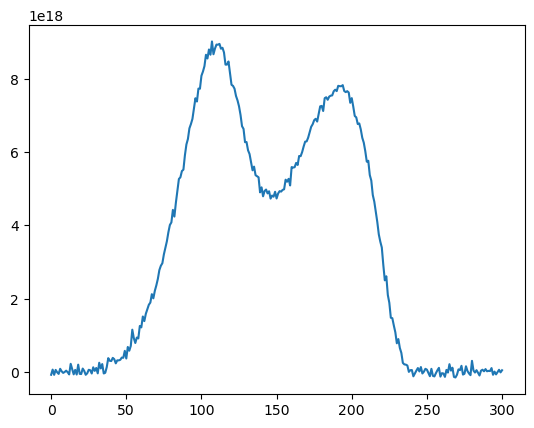

In [9]:
spect_wnoise=[]
noise_array=[]
sigma_list=[]
for n in np.arange(0, len(des_flux)):
    sigma_rand = np.random.uniform(1E14, 1E17)
    for i, k in enumerate(des_flux[n]):
        spect_wnoise.append(np.random.normal(k, sigma_rand))
    sigma_list.append(str(sigma_rand))
    noise_array.append(spect_wnoise)
    spect_wnoise=[]
plt.plot(noise_array[4])
plt.show()

In [10]:
#TSFresh is not reading in large values
#Like the raw TDS data. Normalize beforehand then
#do TSFresh

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True)
des_flux_norm = scaler.fit_transform(des_flux.reshape(-1, 1))

#make back into a 1d dataframe.
#Ask Anze whether it's best to normalize
#by complete dataset or by spectrum

des_flux_norm=pd.DataFrame(des_flux_norm)

In [16]:
#Create an array counting 0 to 499,
#301 times for each count
#This marks the sequential data
#with an id used in TSFresh

des_flux_id = np.arange(0,des_flux_norm.shape[0])
des_flux_id = des_flux_id // 301

#Applies the id to the data
#display(des_flux_id)
des_flux_norm["id"] = des_flux_id
display(des_flux_norm)

0     id
0       -0.863125      0
1       -0.862912      0
2       -0.862812      0
3       -0.862671      0
4       -0.862474      0
...           ...    ...
4259747 -0.863125  14151
4259748 -0.863125  14151
4259749 -0.863125  14151
4259750 -0.863125  14151
4259751 -0.863125  14151

[4259752 rows x 2 columns]

In [15]:
from tsfresh import extract_features
features = extract_features(des_flux_norm, column_id="id", column_sort="id")

Feature Extraction:   0%|          | 0/40 [00:04<?, ?it/s]


TypeError: acf() got an unexpected keyword argument 'unbiased'

In [14]:
from tsfresh import select_features, feature_selection
from tsfresh.feature_selection.relevance import calculate_relevance_table
detrap_en_relevance_table = calculate_relevance_table(features, detrap_en_mean, ml_task='regression')
def_conc_relevance_table = calculate_relevance_table(features, def_conc_mean, ml_task='regression')

NameError: name 'features' is not defined

In [ ]:
from xgboost import XGBClassifier

#==============================================
# TODO: Implement the BDT model instance
#==============================================    
bdt = XGBClassifier(n_estimators=100, max_depth=10, learning_rate=0.1, objective='binary:logistic',
colsample_bytree=0.8, subsample=0.8)

#==============================================
# TODO: Fit the training data
#==============================================    
bdt.fit(X_train, y_train)

# retrieve predictions and take index [:, 1] corresponding to signal
preds_bdt = bdt.predict_proba(X_test)[:, 1]

In [ ]:
import xgboost as xgb

#==============================================
# TODO: Plot the importance using
# xgb.plot_importance
#============================================== 

ax = xgb.plot_importance(bdt, grid=False, max_num_features=10)
ax.get_figure().savefig("importance.pdf")